<a href="https://colab.research.google.com/github/seungwon0601/Tech_Online_Courses_Analysis/blob/master/Analysis_Tech_Trends_with_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Tech Trends with Github

* GitHub Repositories 2020 | [Kaggle](https://www.kaggle.com/vatsalparsaniya/github-repositories-analysis)
* GitHub Top stared Repositories of specific Domain (1200+)

## Content : There are more than 1000 repository information.

---
Data contains the main **19 columns**:
1. topic: A base word with the help of its fetched repository.
2. name: repository name.
3. user: repository user name.
4. star: stars are given by users.
5. fork: number of the fork that specific repository.
6. watch: repository watch
7. issue: number of issue in that repository.
8. pullrequests: number of pull requests 
9. projects: a number of projects undergoing that topictag.
10. topictag: tag added to the repository by the user.
11. discriptiontext: short discription added by user.
12. discription_url: additional url provide by repository.
13. commits: number of commits to that repository.
14. branches: a number of different branches of the repository.
15. packages: number of packages.
16. releases: releases of the repository.
17. contributors: a number of users have contributed to the repository.
18. License: name of License.
19. url: URL of the repository.

>current **repository topics**: Data-Science, Machine-Learning, Open-CV, Computer-Vision, GAN, variational-encoder, Android-studio, flutter, JAVA, awesome, javascript, c++

In [1]:
import pandas as pd

## 1. EDA

- 데이터를 불러와 크기, 컬럼, 요약 내용 등 필요한 정보를 확인합니다.
- 분석에 필요한 내용만 따로 추출해 데이터프레임을 생성합니다.

In [2]:
df = pd.read_csv('/content/Github_data.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,0.0,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [5]:
df.shape

(1500, 21)

In [14]:
df[['topic', 'name', 'star', 'fork', 'watch', 'issue','topic_tag', 'discription_text', 'commits']]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
0,Data-Science,keras,47.9k,18.1k,2.1k,"2,940","['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,"5,342"
1,Data-Science,scikit-learn,40.3k,19.6k,2.2k,"1,505","['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,"25,405"
2,Data-Science,PythonDataScienceHandbook,23.1k,9.9k,1.5k,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,234
3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,21k,6.6k,1.4k,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...","1,079"
4,Data-Science,Data-Science--Cheat-Sheet,18.4k,8.2k,1.5k,7,[],Cheat Sheets,363
...,...,...,...,...,...,...,...,...,...
1495,sensor,react-native-sensor-manager,199,53,7,19,[],Native sensors access for react-native,45
1496,sensor,weatherstation,199,72,31,4,"['android-things', 'google-cloud-pubsub']",Sensor-based peripheral sample using Android T...,64
1497,sensor,OctoPrint-Enclosure,198,77,32,63,"['temperature-sensor', 'enclosure', 'raspberry...",OctoPrint Enclosure Plugin,415
1498,sensor,SensorDashboard,197,110,25,0,[],A sensor dashboard for Android plotting all se...,103


In [15]:
# 필요한 내용만 정리했습니다. 데이터를 저장합니다.
github_df = df[['topic', 'name', 'star', 'fork', 'watch', 'issue','topic_tag', 'discription_text', 'commits']]

## 2. Data Preprocessing

- topic_tag는 빈 값이 많지만 모호한 레퍼지토리 검색을 위해 남겨둡니다.
- discribtion_text는 추후 검색을 위해 남겨둡니다.
- star, fork, watch 칼럼에는 숫자 뒤에 k가 붙어있습니다. **숫자 단위로 변환하고 마침표는 지워줍니다.**

In [21]:
# 단위(k)를 숫자로 변형합니다.
def counts(x):
    rx = x.replace('k','000')
    if '.' in rx:
        rx = rx.replace('.','')
        rx = rx[:-1]
        return int(rx)
    return int(rx)

In [26]:
# counts()함수가 잘 동작하는지 테스트합니다.
github_df['star'].apply(counts)
github_df['fork'].apply(counts)
github_df['watch'].apply(counts)

0       2100
1       2200
2       1500
3       1400
4       1500
        ... 
1495       7
1496      31
1497      32
1498      25
1499      44
Name: watch, Length: 1500, dtype: int64

In [27]:
# counts()함수를 적용합니다.
github_df['star'] = github_df['star'].apply(counts)
github_df['fork'] = github_df['fork'].apply(counts)
github_df['watch'] = github_df['watch'].apply(counts)

# 잘 적용되었는지 확인합니다.
github_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
0,Data-Science,keras,47900,18100,2100,"2,940","['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,"5,342"
1,Data-Science,scikit-learn,40300,19600,2200,"1,505","['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,"25,405"
2,Data-Science,PythonDataScienceHandbook,23100,9900,1500,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,234
3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,21000,6600,1400,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...","1,079"
4,Data-Science,Data-Science--Cheat-Sheet,18400,8200,1500,7,[],Cheat Sheets,363


In [28]:
# 분석 전 평균치 획득을 위해 통계요약을 확인합니다.
github_df.describe()

,star,fork,watch
count,1500.000000,1500.000000,1500.000000
mean,8058.556667,1845.994667,380.881333
std,17031.342041,4572.215953,754.014969
min,4.000000,0.000000,0.000000
25%,576.000000,109.000000,37.000000
50%,1800.000000,385.500000,108.000000
75%,9025.000000,1700.000000,416.000000
max,310000.000000,80900.000000,8400.000000


In [30]:
# topic 종류를 확인합니다.
github_df['topic'].drop_duplicates()

0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
Name: topic, dtype: object

In [31]:
# 각 topic별로 100개 행씩 추출되어 있는 것으로 보입니다. 확인해봅니다.
github_df['topic'][90:110]

90         Data-Science
91         Data-Science
92         Data-Science
93         Data-Science
94         Data-Science
95         Data-Science
96         Data-Science
97         Data-Science
98         Data-Science
99         Data-Science
100    machine-Learning
101    machine-Learning
102    machine-Learning
103    machine-Learning
104    machine-Learning
105    machine-Learning
106    machine-Learning
107    machine-Learning
108    machine-Learning
109    machine-Learning
Name: topic, dtype: object

In [32]:
github_df['topic'][190:210]

190    machine-Learning
191    machine-Learning
192    machine-Learning
193    machine-Learning
194    machine-Learning
195    machine-Learning
196    machine-Learning
197    machine-Learning
198    machine-Learning
199    machine-Learning
200             Open-CV
201             Open-CV
202             Open-CV
203             Open-CV
204             Open-CV
205             Open-CV
206             Open-CV
207             Open-CV
208             Open-CV
209             Open-CV
Name: topic, dtype: object

In [41]:
# 100개 행이 랜덤으로 추출된 것인지, 상위 레포지토리만 추출된 것인지 통계값으로 확인합니다.
github_df[github_df['topic']=='Open-CV']

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
200,Open-CV,SmartOpenCV,1800,509,93,0,"['opencv', 'ai', 'android', 'cv', 'sdk', 'surf...",🔥 🔥 🔥 SmartOpenCV是一个OpenCV在Android端的增强库，解决了Ope...,20
201,Open-CV,OpenCV-Python-Tutorial,1800,733,89,3,"['python', 'opencv', 'tutorial', 'imread', 'im...","OpenCV问答群,QQ群号:187436093",257
202,Open-CV,Learning-OpenCV-3_examples,1400,607,110,12,[],NaN,228
203,Open-CV,OpenCVForAndroid,1300,447,81,17,"['opencv4android', 'facedetect', 'opencv', 'an...",目标检测&目标追踪&人脸检测&人脸识别,37
204,Open-CV,OpenCV-Python-Tutorial,1200,466,67,2,"['opencv', 'opencv-python', 'image-processing']",OpenCV-Python图像处理教程,25
...,...,...,...,...,...,...,...,...,...
295,Open-CV,OpenCV-RgbdOdometry,69,25,6,3,[],⛄ OpenCV RGBD-Odometry (Visual Odometry based ...,15
296,Open-CV,Caffe_OpenCV_Android_App,69,29,7,0,[],This is an example of an Android app that uses...,16
297,Open-CV,SelfDrivingRCCar,69,30,9,4,"['self-driving-car', 'neural-network', 'python...","Autonomous RC Car using Neural Networks, Pytho...",38
298,Open-CV,Hand-Gesture-Recognition-Using-Background-Elll...,69,35,2,0,"['deep-learning', 'convolutional-neural-networ...",Hand Gesture Recognition using Convolution Neu...,38


> 'star' 기준 내림차순 정렬된 것으로 보입니다. 처음부터 가장 높은 star 순으로 데이터가 추출된 것인지 혹은 랜덤 추출 후 데이터가 정렬된 것인지 확인이 필요합니다.
>
>이 경우는 직접 github 사이트 키워드 검색 후 **Most starts** 정렬을 통해 확인해봅니다.

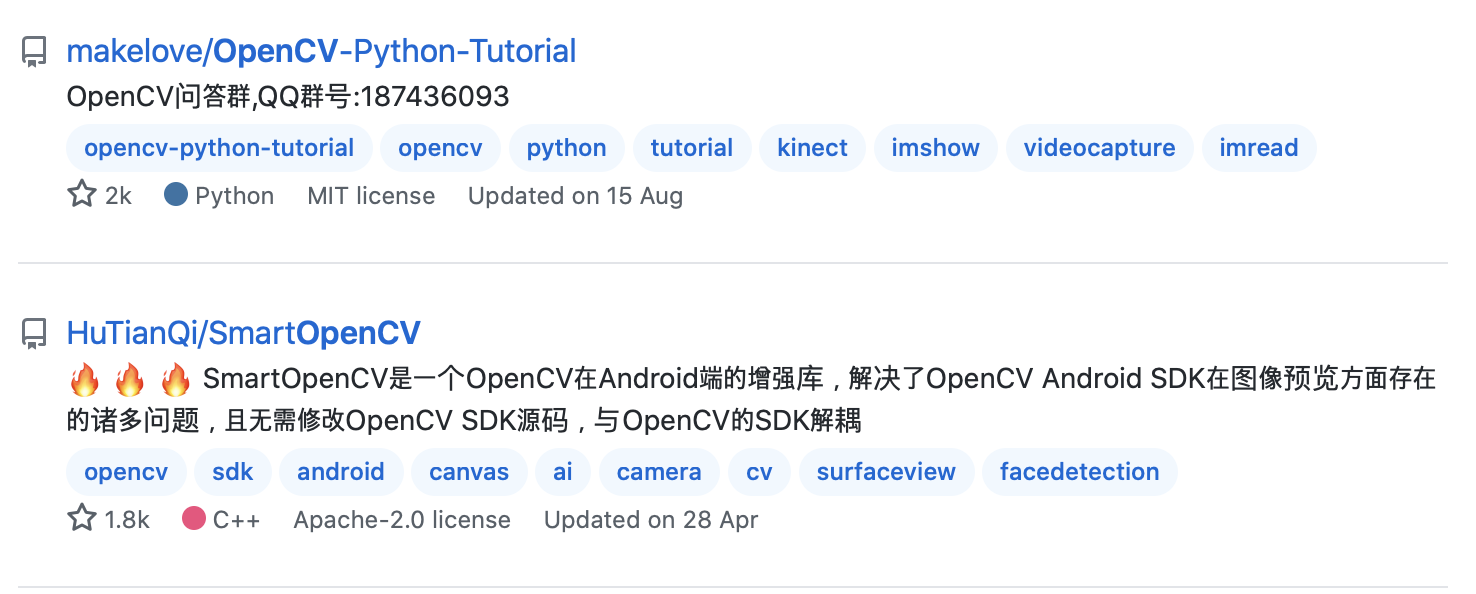

In [47]:
from IPython.display import Image
Image(filename='/content/Open-CV.png', height=280, width=800)

> 5개월 전 데이터이므로 순위 변동이 있엇던 것으로 보이며 최초 추출시 star가 높은 순으로 추출된 것을 확인했습니다.
>
> 편한 마음으로 각 topic별 데이터를 살펴보겠습니다.
> 참고로 앞서 살펴봤던 통계요약표에서 star의 중앙값은 약 8059였으므로 최소 1만 점 이상 star를 획득한 repository라면 이목을 충분히 끌고 있는 주제를 다룬다고 볼 수 있습니다.

In [89]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about Data Science(10,000 or more stars -> 17)
github_df[github_df['topic']=='Data-Science'][:17]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
0,Data-Science,keras,47900,18100,2100,"2,940","['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,"5,342"
1,Data-Science,scikit-learn,40300,19600,2200,"1,505","['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,"25,405"
2,Data-Science,PythonDataScienceHandbook,23100,9900,1500,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,234
3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,21000,6600,1400,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...","1,079"
4,Data-Science,Data-Science--Cheat-Sheet,18400,8200,1500,7,[],Cheat Sheets,363
5,Data-Science,data-science-ipython-notebooks,18300,5700,1600,8,"['python', 'machine-learning', 'deep-learning'...",Data science Python notebooks: Deep learning (...,543
6,Data-Science,spaCy,16200,2900,557,183,"['natural-language-processing', 'data-science'...",💫 Industrial-strength Natural Language Process...,"11,317"
7,Data-Science,ML-From-Scratch,15900,3100,821,20,"['machine-learning', 'deep-learning', 'deep-re...",Machine Learning From Scratch. Bare bones NumP...,374
8,Data-Science,go,14700,5300,1600,22,[],The Open Source Data Science Masters,296
9,Data-Science,ipython,14100,4000,817,"1,292","['ipython', 'jupyter', 'data-science', 'notebo...",Official repository for IPython itself. Other ...,"24,384"


In [85]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about machine-Learning (10,000 or more stars -> 52)
github_df[github_df['topic']=='machine-Learning'][:52]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
100,machine-Learning,tensorflow,144000,80900,8400,"3,300","['tensorflow', 'machine-learning', 'python', '...",An Open Source Machine Learning Framework for ...,"84,328"
101,machine-Learning,keras,47900,18100,2100,"2,940","['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,"5,342"
102,machine-Learning,awesome-machine-learning,44300,11200,3400,1,[],A curated list of awesome Machine Learning fra...,"1,390"
103,machine-Learning,scikit-learn,40300,19600,2200,"1,505","['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,"25,405"
104,machine-Learning,pytorch,38000,9700,1400,"4,243","['neural-network', 'autograd', 'gpu', 'numpy',...",Tensors and Dynamic neural networks in Python ...,"26,014"
105,machine-Learning,TensorFlow-Examples,37100,14000,2100,147,"['tensorflow', 'tutorial', 'examples', 'deep-l...",TensorFlow Tutorial and Examples for Beginners...,227
106,machine-Learning,tesseract,34000,6400,1600,281,"['tesseract', 'tesseract-ocr', 'ocr', 'lstm', ...",Tesseract Open Source OCR Engine (main reposit...,"4,495"
107,machine-Learning,face_recognition,33700,9400,1500,467,"['machine-learning', 'face-detection', 'face-r...",The world's simplest facial recognition api fo...,194
108,machine-Learning,caffe,30200,18200,2200,836,"['deep-learning', 'machine-learning', 'vision']",Caffe: a fast open framework for deep learning.,"4,156"
109,machine-Learning,faceswap,30100,9600,1400,12,"['faceswap', 'face-swap', 'deep-learning', 'de...",Deepfakes Software For All,"1,103"


In [92]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about Open-CV(10,000 or more stars -> 0)
github_df[github_df['topic']=='Open-CV'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
200,Open-CV,SmartOpenCV,1800,509,93,0,"['opencv', 'ai', 'android', 'cv', 'sdk', 'surf...",🔥 🔥 🔥 SmartOpenCV是一个OpenCV在Android端的增强库，解决了Ope...,20
201,Open-CV,OpenCV-Python-Tutorial,1800,733,89,3,"['python', 'opencv', 'tutorial', 'imread', 'im...","OpenCV问答群,QQ群号:187436093",257
202,Open-CV,Learning-OpenCV-3_examples,1400,607,110,12,[],NaN,228
203,Open-CV,OpenCVForAndroid,1300,447,81,17,"['opencv4android', 'facedetect', 'opencv', 'an...",目标检测&目标追踪&人脸检测&人脸识别,37
204,Open-CV,OpenCV-Python-Tutorial,1200,466,67,2,"['opencv', 'opencv-python', 'image-processing']",OpenCV-Python图像处理教程,25
205,Open-CV,OpenCV3-Intro-Book-Src,1200,758,122,5,"['opencv', 'book-source-code', 'c-plus-plus']",📘《OpenCV3编程入门》书本配套源码 |《Introduction to OpenCV3...,24
206,Open-CV,OpenCV2-Python-Tutorials,1000,820,92,54,"['opencv-3x', 'opencv-python-library', 'python']",This repo contains tutorials on OpenCV-Python ...,167
207,Open-CV,Install-OpenCV,951,947,66,22,[],shell scripts to install different version of ...,91
208,Open-CV,OpenCVSwiftStitch,792,103,56,6,[],Version 3 of OpenCVStitch. How to stitch image...,71
209,Open-CV,OpenCV-Face-Recognition,505,538,44,9,[],Real-time face recognition project with OpenCV...,9


In [93]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about Computer-Vision(10,000 or more stars -> 8)
github_df[github_df['topic']=='Computer-Vision'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
300,Computer-Vision,opencv,43900,34900,2600,"1,692","['opencv', 'c-plus-plus', 'computer-vision', '...",Open Source Computer Vision Library,"28,489"
301,Computer-Vision,openpose,16700,5000,871,22,"['openpose', 'computer-vision', 'machine-learn...",OpenPose: Real-time multi-person keypoint dete...,609
302,Computer-Vision,cs-video-courses,14600,2000,765,3,"['computer-science', 'algorithms', 'systems', ...",List of Computer Science courses with video le...,223
303,Computer-Vision,Virgilio,12500,2500,873,1,"['tensorflow', 'machine-learning', 'machine-vi...",Your new Mentor for Data Science E-Learning.,"1,181"
304,Computer-Vision,awesome-computer-vision,12200,3100,1100,10,[],A curated list of awesome computer vision reso...,186
305,Computer-Vision,pytorch-CycleGAN-and-pix2pix,11600,3400,311,189,"['pytorch', 'gan', 'cyclegan', 'pix2pix', 'dee...",Image-to-Image Translation in PyTorch,445
306,Computer-Vision,facenet,10400,4200,581,439,"['face-recognition', 'tensorflow', 'facenet', ...",Face recognition using Tensorflow,566
307,Computer-Vision,learnopencv,10200,6700,842,139,"['computer-vision', 'machine-learning', 'ai', ...",Learn OpenCV : C++ and Python Examples,857
308,Computer-Vision,AirSim,9800,2600,567,524,"['drones', 'ai', 'self-driving-car', 'autonomo...",Open source simulator for autonomous vehicles ...,"2,072"
309,Computer-Vision,Awesome-pytorch-list,9700,2100,572,0,"['pytorch', 'python', 'machine-learning', 'dee...",A comprehensive list of pytorch related conten...,714


In [94]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about GAN(10,000 or more stars -> 1)
github_df[github_df['topic']=='GAN'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
400,GAN,pytorch-CycleGAN-and-pix2pix,11600,3400,311,189,"['pytorch', 'gan', 'cyclegan', 'pix2pix', 'dee...",Image-to-Image Translation in PyTorch,445
401,GAN,CycleGAN,9600,1600,401,35,"['gan', 'generative-adversarial-network', 'dee...",Software that can generate photos from paintin...,95
402,GAN,the-gan-zoo,8300,1800,525,12,"['machine-learning', 'gan', 'generative-advers...",A list of all named GANs!,175
403,GAN,ganhacks,8200,1400,347,44,[],"starter from ""How to Train a GAN?"" at NIPS2016",6
404,GAN,pix2pix,7600,1300,307,65,"['computer-vision', 'computer-graphics', 'gan'...",Image-to-image translation with conditional ad...,129
405,GAN,fashion-mnist,7600,1700,291,20,"['mnist', 'deep-learning', 'benchmark', 'machi...",A MNIST-like fashion product database. Benchma...,204
406,GAN,pytorch-book,7200,2600,253,105,"['pytorch', 'pytorch-tutorials', 'pytorch-tuto...",PyTorch tutorials and fun projects including n...,74
407,GAN,Keras-GAN,6800,2500,270,92,"['deep-learning', 'gan', 'keras', 'generative-...",Keras implementations of Generative Adversaria...,184
408,GAN,DCGAN-tensorflow,6500,2600,244,173,"['tensorflow', 'dcgan', 'gan', 'generative-mod...","A tensorflow implementation of ""Deep Convoluti...",299
409,GAN,PyTorch-GAN,6100,1700,169,44,[],PyTorch implementations of Generative Adversar...,191


In [95]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about variational-encoder(10,000 or more stars -> 1)
github_df[github_df['topic']=='variational-encoder'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
500,variational-encoder,alfred-encode-decode-workflow,379,22,18,5,[],Encoding and decoding a sting into multiple va...,24
501,variational-encoder,tensorflow-mnist-VAE,377,154,15,6,"['tensorflow', 'mnist', 'vae', 'variational-au...",Tensorflow implementation of variational auto-...,9
502,variational-encoder,probabilistic_unet,373,63,17,7,"['u-net', 'variational-inference', 'semantic-s...",A U-Net combined with a variational auto-encod...,20
503,variational-encoder,Variational-Autoencoder,360,142,24,0,[],Implementation of a variational Auto-encoder,16
504,variational-encoder,Generative_Models_Tutorial_with_Demo,266,33,14,0,"['variational-autoencoder', 'generative-advers...",Generative Models Tutorial with Demo: Bayesian...,41
505,variational-encoder,donut,238,81,21,8,['code'],WWW 2018: Unsupervised Anomaly Detection via V...,20
506,variational-encoder,VAE-Torch,232,61,17,0,[],Implementation of Variational Auto-Encoder in ...,45
507,variational-encoder,fauxtograph,216,57,94,8,[],Tools for using a variational auto-encoder for...,63
508,variational-encoder,s-vae-pytorch,212,25,8,0,"['pytorch', 'vae', 'variational-autoencoder', ...",Pytorch implementation of Hyperspherical Varia...,23
509,variational-encoder,VAE-TensorFlow,185,75,7,0,[],Implementation of a Variational Auto-Encoder i...,7


In [96]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about Android-studio(10,000 or more stars -> 0)
github_df[github_df['topic']=='Android-studio'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
600,Android-studio,AndroidCodeStyle,188,64,25,8,"['java', 'kotlin', 'codestyle', 'formatting', ...",Android code style settings for Android Studio...,77
601,Android-studio,hbworkspace2-100,185,151,27,0,[],(1) Name :- ActionBarSearchView Description :-...,7
602,Android-studio,Animatoo,184,41,10,0,"['android-library', 'android', 'android-studio...",A lightweight and easy to use Android library ...,13
603,Android-studio,tensorflow-hangul-recognition,173,109,29,3,"['tensorflow', 'android', 'java', 'python', 'h...",Handwritten Korean Character Recognition with ...,100
604,Android-studio,fcm-push-plugin,170,1,7,0,"['android-studio', 'android', 'kotlin', 'intel...",IntelliJ IDEA plugin to send pushes using Fire...,58
605,Android-studio,intellij-haxe,169,93,44,263,"['intellij', 'idea', 'idea-plugin', 'android-s...",Haxe plugin for IntelliJ Platform based IDEs (...,"2,550"
606,Android-studio,MvpAutoCodePlus,169,22,4,1,"['mvp', 'idea-plugin', 'androidstudio-plugin',...",🔌An IDEA/Android Studio plug-in that automatic...,63
607,Android-studio,PerfectShow,168,76,17,25,"['opencv', 'android', 'opencv-android-sdk', 'a...","Android virtual makeup app, apply cosmetics on...",113
608,Android-studio,ArtifactFinder,167,4,6,7,[],An Android Studio Plugin to find Maven Artifac...,54
609,Android-studio,GreenDaoForAndroidStudio,165,58,16,2,[],GreenDao Module for Android Studio,7


In [97]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about flutter(10,000 or more stars -> 4)
github_df[github_df['topic']=='flutter'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
700,flutter,flutter,91100,12200,2800,"5,000+","['mobile', 'android', 'ios', 'material-design'...",Flutter makes it easy and fast to build beauti...,"18,573"
701,flutter,flutter-go,20700,3100,616,148,"['flutter', 'dart', 'flutter-demo', 'flutter-d...",flutter 开发者帮助 APP，包含 flutter 常用 140+ 组件的demo 演...,751
702,flutter,gsy_github_app_flutter,10700,1800,295,7,"['flutter', 'flutter-ui', 'flutter-app', 'flut...",Flutter 超完整的开源项目，功能丰富，适合学习和日常使用。GSYGithubApp系列...,734
703,flutter,plugins,10500,4800,443,212,"['flutter', 'dart', 'plugin', 'android', 'ios'...",Plugins for Flutter maintained by the Flutter ...,"1,922"
704,flutter,FlutterExampleApps,9600,1900,598,0,"['flutter', 'flutter-apps', 'flutter-plugin', ...","[Example APPS] Basic Flutter apps, for flutter...",43
705,flutter,flutter-in-action,7300,1500,202,51,"['flutter', 'flutter-book']",《Flutter实战》电子书,577
706,flutter,samples,6900,2100,373,16,[],A collection of Flutter examples and demos.,367
707,flutter,flutter-desktop-embedding,6400,493,287,13,[],"Examples of using, and testbed for, the in-dev...",449
708,flutter,fish-redux,6300,687,172,85,"['flutter', 'redux', 'component', 'functional-...",An assembled flutter application framework.,463
709,flutter,Best-Flutter-UI-Templates,6000,1300,238,11,"['flutter', 'flutter-apps', 'flutter-ui', 'flu...",completely free for everyone. Its build-in Flu...,64


In [104]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about java(10,000 or more stars -> 82)
github_df[github_df['topic']=='java'][:85]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
800,java,CS-Notes,98400,32100,4800,27,"['algorithm', 'leetcode', 'interview', 'comput...",📚 技术面试必备基础知识、Leetcode、计算机操作系统、计算机网络、系统设计、Java、...,"3,615"
801,java,javascript,94800,18500,3600,79,"['javascript', 'eslint', 'naming-conventions',...",JavaScript Style Guide,"1,812"
802,java,JavaGuide,76400,26300,3900,26,"['java', 'jvm', 'interview', 'redis', 'spring'...",【Java学习+面试指南】 一份涵盖大部分Java程序员所需要掌握的核心知识。,"2,281"
803,java,javascript-algorithms,68800,11400,2700,49,"['javascript', 'algorithms', 'algorithm', 'jav...",📝 Algorithms and data structures implemented i...,790
804,java,java-design-patterns,57100,18400,4000,162,"['java', 'principles', 'design-patterns', 'awe...",Design patterns implemented in Java,"2,421"
...,...,...,...,...,...,...,...,...,...
880,java,technology-talk,10100,3000,796,7,"['java', 'spring', 'springboot', 'dubbo', 'kaf...",汇总java生态圈常用技术框架、开源中间件，系统架构、数据库、大公司架构案例、常用三方类库、...,260
881,java,recyclerview-animators,10000,1900,320,100,"['android', 'android-library', 'recyclerview',...",An Android Animation library which easily add ...,280
882,java,PermissionsDispatcher,9900,1300,277,9,"['android', 'kotlin', 'java', 'runtime-permiss...",Simple annotation-based API to handle runtime ...,725
883,java,uCrop,9800,1700,256,92,"['android', 'java', 'image', 'photo', 'crop', ...",Image Cropping Library for Android,333


In [106]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about awesome(10,000 or more stars -> 0)
github_df[github_df['topic']=='awesome'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
900,awesome,awesome-self-supervised-learning,2000,320,140,0,"['machine-learning', 'computer-vision', 'self-...",A curated list of awesome self-supervised methods,116
901,awesome,awesome-eslint,2000,148,67,1,"['awesome-list', 'awesome', 'list', 'eslint']","A list of awesome ESLint plugins, configs, etc.",172
902,awesome,awesome-json-datasets,2000,266,89,0,"['json-dataset', 'json', 'awesome', 'awesome-l...",A curated list of awesome JSON datasets that d...,256
903,awesome,awesome-copycats,2000,421,115,3,"['awesomewm', 'themes', 'lua']",Awesome WM themes,821
904,awesome,awesome-pentest-cheat-sheets,2000,513,151,1,"['cheatsheet', 'security-cheat-sheets', 'pente...",Collection of the cheat sheets useful for pent...,76
905,awesome,awesome-django,2000,396,109,0,"['awesome-list', 'django', 'awesome']",A curated list of awesome things related to Dj...,211
906,awesome,awesome-compose,1900,144,65,3,"['awesome-list', 'awesome', 'docker-compose']",Awesome Docker Compose samples,115
907,awesome,awesome-etl,1900,222,133,3,[],"A curated list of awesome ETL frameworks, libr...",53
908,awesome,awesome-online-ide,1900,172,86,9,"['awesome', 'awesome-list', 'ide', 'lists', 'l...",🌩️ A list of awesome online development enviro...,198
909,awesome,bug-bounty-reference,1900,648,195,0,[],Inspired by https://github.com/djadmin/awesome...,196


In [110]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about javascript(10,000 or more stars -> 100+)
github_df[github_df['topic']=='javascript'][:100]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
1000,javascript,freeCodeCamp,310000,24000,8400,172,"['learn-to-code', 'nonprofits', 'programming',...",freeCodeCamp.org's open source codebase and cu...,"25,593"
1001,javascript,vue,163000,24600,6100,309,"['vue', 'javascript', 'frontend', 'framework']","🖖 Vue.js is a progressive, incrementally-adopt...","3,097"
1002,javascript,react,147000,28500,6700,457,"['javascript', 'react', 'frontend', 'declarati...","A declarative, efficient, and flexible JavaScr...","13,156"
1003,javascript,bootstrap,140000,68700,7200,302,"['css', 'bootstrap', 'javascript', 'html', 'sc...","The most popular HTML, CSS, and JavaScript fra...","19,599"
1004,javascript,You-Dont-Know-JS,120000,24200,5400,74,"['book-series', 'javascript', 'closures', 'pro...",A book series on JavaScript. @YDKJS on twitter.,"1,753"
...,...,...,...,...,...,...,...,...,...
1095,javascript,uni-app,20600,1800,392,445,"['uni-app', 'vue', 'mpvue', 'miniprogram', 'ja...",uni-app 是使用 Vue 语法开发小程序、H5、App的统一框架,"4,568"
1096,javascript,html2canvas,20300,3500,510,569,"['javascript', 'screenshot', 'dom']",Screenshots with JavaScript,944
1097,javascript,uBlock,20100,1600,767,73,"['ublock-origin', 'blocker', 'firefox', 'chrom...",uBlock Origin - An efficient blocker for Chrom...,"7,485"
1098,javascript,awesome-javascript,20100,2900,1000,17,[],🐢 A collection of awesome browser-side JavaScr...,674


In [111]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about c++(10,000 or more stars -> 100+)
github_df[github_df['topic']=='c++'][:100]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
1100,c++,coding-interview-university,110000,32100,5800,26,"['computer-science', 'interview', 'programming...",A complete computer science study plan to beco...,"1,342"
1101,c++,CS-Notes,98400,32100,4800,27,"['algorithm', 'leetcode', 'interview', 'comput...",📚 技术面试必备基础知识、Leetcode、计算机操作系统、计算机网络、系统设计、Java、...,"3,615"
1102,c++,the-art-of-command-line,74300,8500,2400,84,"['bash', 'unix', 'documentation', 'linux', 'ma...","Master the command line, in one page","1,185"
1103,c++,animate.css,66200,14200,2400,4,"['css-animations', 'css', 'animation', 'styles...",🍿 A cross-browser library of CSS animations. A...,459
1104,c++,computer-science,58900,8700,3400,12,"['computer-science', 'awesome-list', 'courses'...",🎓 Path to a free self-taught education in Comp...,793
...,...,...,...,...,...,...,...,...,...
1195,c++,linux-command,12100,2900,412,17,"['linux', 'linux-command', 'search', 'screen',...",Linux命令大全搜索工具，内容包含Linux命令手册、详解、学习、搜集。https://g...,609
1196,c++,react-canvas,12300,955,415,63,[],High performance <canvas> rendering for React ...,84
1197,c++,graal,12300,855,445,589,"['polyglot', 'vm', 'java', 'javascript', 'pyth...",GraalVM: Run Programs Faster Anywhere 🚀,"44,003"
1198,c++,awesome-cheatsheets,12200,2000,438,6,"['cheatsheets', 'javascript', 'bash', 'nodejs'...",👩‍💻👨‍💻 Awesome cheatsheets for popular program...,461


In [113]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about Raspberry pi(10,000 or more stars -> 100+)
github_df[github_df['topic']=='Raspberry pi'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
1200,Raspberry pi,RetroPie-Setup,8500,1200,564,41,"['raspberry-pi', 'pi', 'retrogaming', 'emulati...",Shell script to set up a Raspberry Pi/Odroid/P...,"6,321"
1201,Raspberry pi,raspberry-pi-os,7300,653,394,22,"['raspberry-pi', 'linux-kernel', 'osdev', 'arm...",Learning operating system development using Li...,458
1202,Raspberry pi,qt,7300,538,297,226,"['go', 'gui-framework', 'qt', 'cross-platform-...",Qt binding for Go (Golang) with support for Wi...,832
1203,Raspberry pi,awesome-raspberry-pi,6800,680,382,1,"['awesome', 'raspberry-pi', 'resources', 'list...",📝 A curated list of awesome Raspberry Pi tools...,330
1204,Raspberry pi,linux,6700,3300,737,281,[],Kernel source tree for Raspberry Pi Foundation...,"797,646"
1205,Raspberry pi,poisontap,5300,985,335,84,[],Exploits locked/password protected computers o...,41
1206,Raspberry pi,firmware,3400,1200,423,218,[],This repository contains pre-compiled binaries...,952
1207,Raspberry pi,home-automation,3400,261,151,11,"['nodejs', 'raspberry', 'phone', 'javascript',...",Raspberry Pi 3 based home automation with Node...,48
1208,Raspberry pi,documentation,3300,1500,318,54,[],Official documentation for the Raspberry Pi,"2,837"
1209,Raspberry pi,pivpn,3200,327,134,43,"['openvpn', 'openvpn-installer', 'pivpn', 'ras...","The Simplest VPN installer, designed for Raspb...",594


In [115]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about Arduino(10,000 or more stars -> 4)
github_df[github_df['topic']=='Arduino'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
1300,Arduino,johnny-five,11400,1700,466,44,"['javascript', 'arduino', 'tessel', 'raspberry...",JavaScript Robotics and IoT programming framew...,"3,318"
1301,Arduino,Arduino,11200,9400,922,243,[],ESP8266 core for Arduino,"3,626"
1302,Arduino,Tasmota,10400,2400,559,26,"['tasmota', 'firmware', 'esp8266', 'sonoff', '...",Alternative firmware for ESP8266 with easy con...,"6,490"
1303,Arduino,Arduino,10100,6700,1000,812,[],open-source electronics platform,"7,221"
1304,Arduino,Marlin,7200,9400,788,646,"['reprap', 'arduino', '3d-printing', 'firmware...",Optimized firmware for RepRap 3D printers base...,"14,367"
1305,Arduino,esp8266_deauther,6500,1600,438,68,"['wifi', 'arduino', 'attack', 'esp8266', 'deau...",Cheap WiFi hacks,604
1306,Arduino,gobot,6400,807,326,119,"['robotics', 'iot', 'drone', 'go', 'robot', 'u...","Golang framework for robotics, drones, and the...","2,639"
1307,Arduino,lowlevelprogramming-university,6100,428,269,0,"['linux-kernel-hacking', 'c-programming', 'har...",How to be low-level programmer,163
1308,Arduino,tinygo,6100,281,130,72,"['golang', 'microcontroller', 'tinygo', 'llvm'...",Go compiler for small places. Microcontrollers...,"1,483"
1309,Arduino,arduino-esp32,4700,2900,416,195,"['arduino', 'esp-idf', 'platformio', 'esp32']",Arduino core for the ESP32,"1,066"


In [117]:
'''
Topic list =    
0              Data-Science
100        machine-Learning
200                 Open-CV
300         Computer-Vision
400                     GAN
500     variational-encoder
600          Android-studio
700                 flutter
800                    java
900                 awesome
1000             javascript
1100                    c++
1200           Raspberry pi
1300                Arduino
1400                 sensor
'''
# Most Popular Repositories about sensor(10,000 or more stars -> 0)
github_df[github_df['topic']=='sensor'][:10]

,topic,name,star,fork,watch,issue,topic_tag,discription_text,commits
1400,sensor,howmanypeoplearearound,6200,342,165,18,"['tshark', 'wifi', 'location', 'sensor']",Count the number of people around you 👨‍👨‍👦 by...,122
1401,sensor,BossSensor,5900,1100,280,24,"['machine-learning', 'cnn', 'deep-learning', '...",Hide screen when boss is approaching.,61
1402,sensor,haven,5800,704,292,117,"['sensor', 'device-sensors', 'monitoring-servi...",Haven is for people who need a way to protect ...,879
1403,sensor,cartographer,4900,1600,386,157,"['slam', 'mapping', 'localization', 'robotics'...",Cartographer is a system that provides real-ti...,"1,090"
1404,sensor,maltrail,3600,697,215,65,"['security', 'malware', 'intrusion-detection',...",Malicious traffic detection system,"28,512"
1405,sensor,LSTM-Human-Activity-Recognition,2600,765,153,12,"['machine-learning', 'deep-learning', 'lstm', ...",Human Activity Recognition example using Tenso...,22
1406,sensor,sensey,2500,255,74,26,"['android-library', 'detect-gestures', 'gestur...",⚡ [Android Library] Play with sensor events & ...,203
1407,sensor,react-visibility-sensor,1700,160,21,56,[],Sensor component for React that notifies you w...,263
1408,sensor,easydeviceinfo,1600,206,50,4,"['android', 'easydeviceinfo', 'android-library...",📱 [Android Library] Get device information in ...,209
1409,sensor,DHT-sensor-library,1300,1100,151,8,[],"Arduino library for DHT11, DHT22, etc Temperat...",117


## 3. Visualization

- 각 topic들을 기준으로 비교 차트를 그려봅니다.

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt